In [1]:
# 입력받은 문장을 토큰화
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [2]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


- {ch: idx ~ } 는 무슨뜻일까? ch는 char를 의미하는건가??????
- ch - 사전의 키, i - 해당 키의 값 > 딕셔너리 
1. chars = ['d', 'a', 'b'] > 문자열로 나열 
2. sorted(chars)=> ['a', 'b', 'd'] > 알파벳 순으로 나열 
3. enumerate(sorted(chars))=> 펼쳐지는 제너레이터 객체[(0, 'a'), (1, 'b'), (2, 'd')] > enumerate() 함수를 사용해 리스트가 있는 경우 순서와 리스트의 값을 출력
4. char_to_ix = {'a': 0, 'b': 1, 'd': 2}

- 근데 sort함수를 사용했는데 알파벳 순서대로 출력이 안되는 이유는 뭘까?????


https://stackoverflow.com/questions/54750750/what-does-char-to-ix-chi-for-i-ch-in-enumeratesortedchars-do

https://wikidocs.net/20792

In [3]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


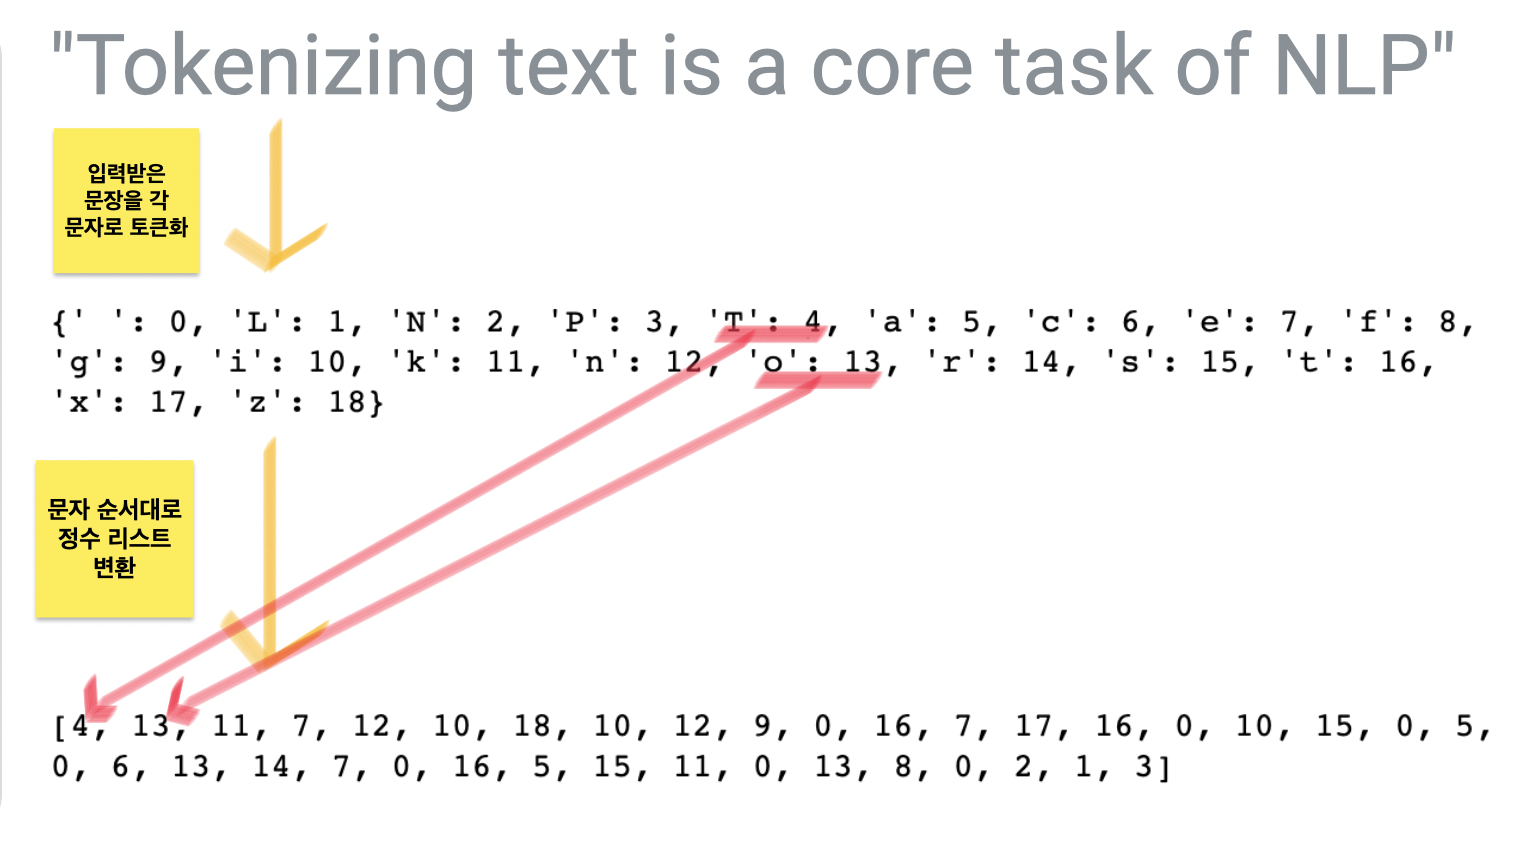

In [4]:
# input_ids를 원-핫 벡터의 2D 텐서로 바꿔준다. 
import pandas as pd

categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megathron"], "Label ID" : [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megathron,2


- 이름 사이에 가상의 순서가 만들어진다는 문제가 있다. > ????????? 이해 안됨
- 고유한 아이디 말고 0,1,2 순서를 가상의 순서라고 말하는건가????????????????
- 범주마다 새 열을 만들어 이름이 범주에 해당하면 1, 그렇지 않으면 0을 할당

In [5]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megathron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


- get_dummies() 적용하면 column이 카테고리의 개수만큼 생기고 해당 데이터가 가지는 값에 1 값을 저장
- https://velog.io/@daeungdaeung/Pandas-getdummies-%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C

In [6]:
import torch 
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes = len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

- 38개의 입력 토큰 각각에 20차원의 원-핫 벡터
- 중복을 제외?한 고유 문자가 20개 > 인덱스가 0부터 19
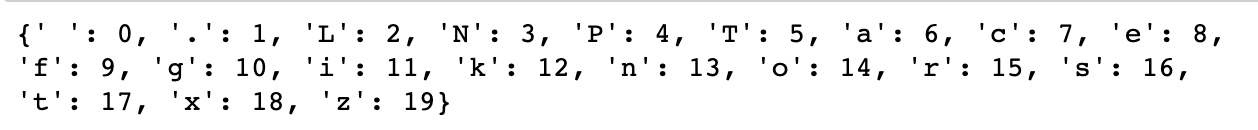

- one_hot() 함수에 항상 num_classes 매개변수를 지정하는 것이 중요하다. > 원-핫 벡터가 어휘사전 길이보다 짧아진다.(수동으로 0으로 패딩해야 한다) 
- 텐서플로 > tf.one.hot() > depth의 매개변수 == numclasses 역할 

In [7]:
import torch 
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes = -1)
one_hot_encodings.shape

/tmp/ipykernel_120/2192911428.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([38, 20])

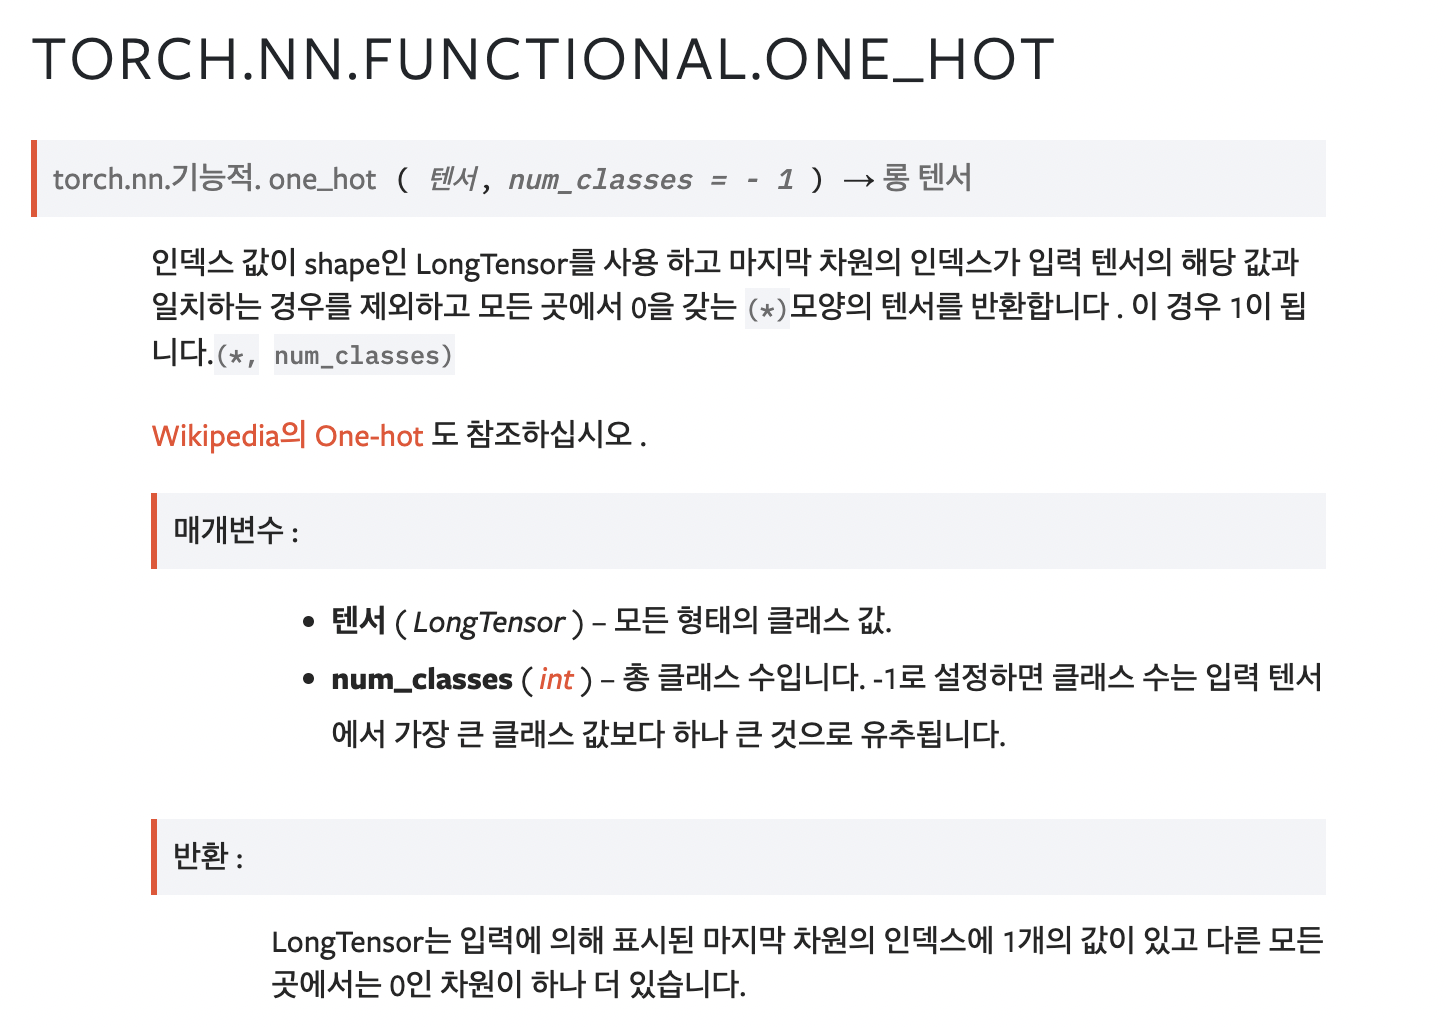

https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

- 궁금해서 num_classes를 -1로 설정해봤는데 차이가 없네요?

In [8]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")
# T의 값이 존재하는 부분은 1로 출력되는걸 확인

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


1. 문자 수준의 토큰화는 텍스트의 구조를 무시하고 전체 문자열을 문자 스트림으로 처리하다는 것을 확인 
2. 철자 오류, 희귀한 단어 처리 유용 > 단어 같은 언어 구조를 데이터에서 학습해야 한다는 단점 
3. 문자 수준의 토큰화는 거의 사용 x
4. "안녕하세요" > "안","녕","하","세","요" > 단어의 의미를 알기가 어렵다. 
